In [227]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

## Download the top 100 coins from 'https://coinmarketcap.com/'


In [307]:
data = requests.get('https://coinmarketcap.com/') 
soup = BeautifulSoup(data._content, 'html.parser')
table = soup.find('table', {'class': 'table'})
overview_df = pd.read_html(str(table))[0]

#  Splits the 'Name' field into 2 parts at a space, and replaces any remaining spaces with a '-' to generate
#  the 'Symbol' for lookup 
overview_df['Symbol'] = overview_df['Name'].str.split(' ', expand=True, n=1)[1].str.replace(' ', '-')

In [371]:
#  Fixes up CionMarketCaps non-standard links :/
overview_df.loc[overview_df['Symbol'] == 'Gnosis', 'Symbol'] = 'gnosis-gno'
overview_df.loc[overview_df['Symbol'] == 'Bytecoin', 'Symbol'] = 'bytecoin-bcn'
overview_df.loc[overview_df['Symbol'] == 'Basic-Attenti...', 'Symbol'] = 'basic-attention-token'
overview_df.loc[overview_df['Symbol'] == 'Byteball-Bytes', 'Symbol'] = 'byteball'
overview_df.loc[overview_df['Symbol'] == 'Santiment-Net...', 'Symbol'] = 'santiment'
overview_df.loc[overview_df['Symbol'] == 'Raiden-Networ...', 'Symbol'] = 'raiden-network-token'
overview_df.loc[overview_df['Symbol'] == 'Metaverse-ETP', 'Symbol'] = 'metaverse'

In [315]:
# Example data
overview_df.head(20)

,#,Name,Market Cap,Price,Volume (24h),Circulating Supply,Change (24h),Price Graph (7d),Symbol
0,1,BTC Bitcoin,"$317,620,010,258",$18962.70,"$13,865,300,000","16,749,725 BTC",-3.08%,NaN,Bitcoin
1,2,ETH Ethereum,"$70,944,186,147",$735.79,"$2,472,780,000","96,418,413 ETH",2.84%,NaN,Ethereum
2,3,BCH Bitcoin Cash,"$35,638,166,414",$2113.46,"$1,581,230,000","16,862,475 BCH",13.76%,NaN,Bitcoin-Cash
3,4,XRP Ripple,"$28,662,047,315",$0.739873,"$1,013,220,000","38,739,144,847 XRP *",0.83%,NaN,Ripple
4,5,LTC Litecoin,"$17,406,356,507",$320.18,"$1,263,960,000","54,365,133 LTC",0.02%,NaN,Litecoin
5,6,ADA Cardano,"$12,376,364,903",$0.477353,"$258,916,000","25,927,070,538 ADA *",-5.44%,NaN,Cardano
6,7,MIOTA IOTA,"$11,079,569,047",$3.99,"$454,818,000","2,779,530,283 MIOTA *",9.03%,NaN,IOTA
7,8,DASH Dash,"$8,426,514,758",$1085.80,"$265,291,000","7,760,651 DASH",0.03%,NaN,Dash
8,9,XEM NEM,"$7,048,853,999",$0.783206,"$94,895,000","8,999,999,999 XEM *",14.50%,NaN,NEM
9,10,XMR Monero,"$5,593,932,106",$361.04,"$189,918,000","15,493,811 XMR",4.11%,NaN,Monero


## Get historical data for the number of coins selected



In [313]:
number_of_coins = 100
start_date = '20170101'
end_date = '20171212'

first = True

for index, row in overview_df.head(number_of_coins).iterrows():
    print(row['Symbol'])
    data = requests.get('https://coinmarketcap.com/currencies/' + row['Symbol'] + '/historical-data/?start=' + start_date + '&end=' + end_date) 
    soup = BeautifulSoup(data._content, 'html.parser')
    table = soup.find('table', {'class': 'table'})
       
    if first:
        prices_df = (pd.read_html(str(table))[0])
        prices_df['Symbol'] = row['Symbol']
        first = False
    else:
        try:
            new_df = (pd.read_html(str(table))[0])
            new_df['Symbol'] = row['Symbol']
            prices_df = pd.concat([prices_df, new_df], ignore_index=True)
        except:
            print('failed')


Bitcoin
Ethereum
Bitcoin-Cash
Ripple
Litecoin
Cardano
IOTA
Dash
NEM
Monero
Bitcoin-Gold
NEO
Stellar
EOS
Ethereum-Classic
Qtum
TRON
BitConnect
Lisk
Populous
OmiseGO
Zcash
Waves
Stratis
Hshare
BitShares
Tether
Ardor
Nxt
bytecoin-bcn
MonaCoin
Verge
Dogecoin
Steem
Ark
Status
Veritaseum
Decred
Binance-Coin
Komodo
Einsteinium
SALT
Augur
Siacoin
VeChain
Electroneum
Golem
PIVX
TenX
Vertcoin
basic-attention-token
byteball
Power-Ledger
Gas
Kyber-Network
QASH
Bytom
Factom
RaiBlocks
DigiByte
DigixDAO
MaidSafeCoin
Aeternity
Syscoin
Walton
GXShares
santiment
Cryptonex
BitcoinDark
ZCoin
Decentraland
0x
Nexus
Iconomi
raiden-network-token
GameCredits
Request-Network
Gnosis
FunFair
Dragonchain
Monaco
PayPie
Streamr-DATAcoin
Civic
Metal
BitBay
NAV-Coin
Bancor
metaverse
Blocknet
Peercoin
Edgeless
Substratum
Storj
ChainLink
Aion
Revain
Dent
Pura
Skycoin


In [357]:
prices_df.head(10)

,Date,Open,High,Low,Close,Volume,Market Cap,Symbol
0,"Dec 12, 2017",16919.8,17781.8,16571.6,17415.4,1.460380e+10,283155000000,Bitcoin
1,"Dec 11, 2017",15427.4,17513.9,15404.8,16936.8,1.215390e+10,258147000000,Bitcoin
2,"Dec 10, 2017",15168.4,15850.6,13226.6,15455.4,1.343330e+10,253782000000,Bitcoin
3,"Dec 09, 2017",16523.3,16783.0,13674.9,15178.2,1.391130e+10,276415000000,Bitcoin
4,"Dec 08, 2017",17802.9,18353.4,14336.9,16569.4,2.113600e+10,297787000000,Bitcoin
5,"Dec 07, 2017",14266.1,17899.7,14057.3,17899.7,1.795070e+10,238600000000,Bitcoin
6,"Dec 06, 2017",11923.4,14369.1,11923.4,14291.5,1.265630e+10,199390000000,Bitcoin
7,"Dec 05, 2017",11685.7,12032.0,11604.6,11916.7,6.895260e+09,195389000000,Bitcoin
8,"Dec 04, 2017",11315.4,11657.2,11081.8,11657.2,6.132410e+09,189172000000,Bitcoin
9,"Dec 03, 2017",11082.7,11858.7,10862.0,11323.2,6.608310e+09,185258000000,Bitcoin


In [378]:
%store overview_df
%store prices_df

Stored 'overview_df' (DataFrame)
Stored 'prices_df' (DataFrame)


## Plot the data, normalised to the latset date

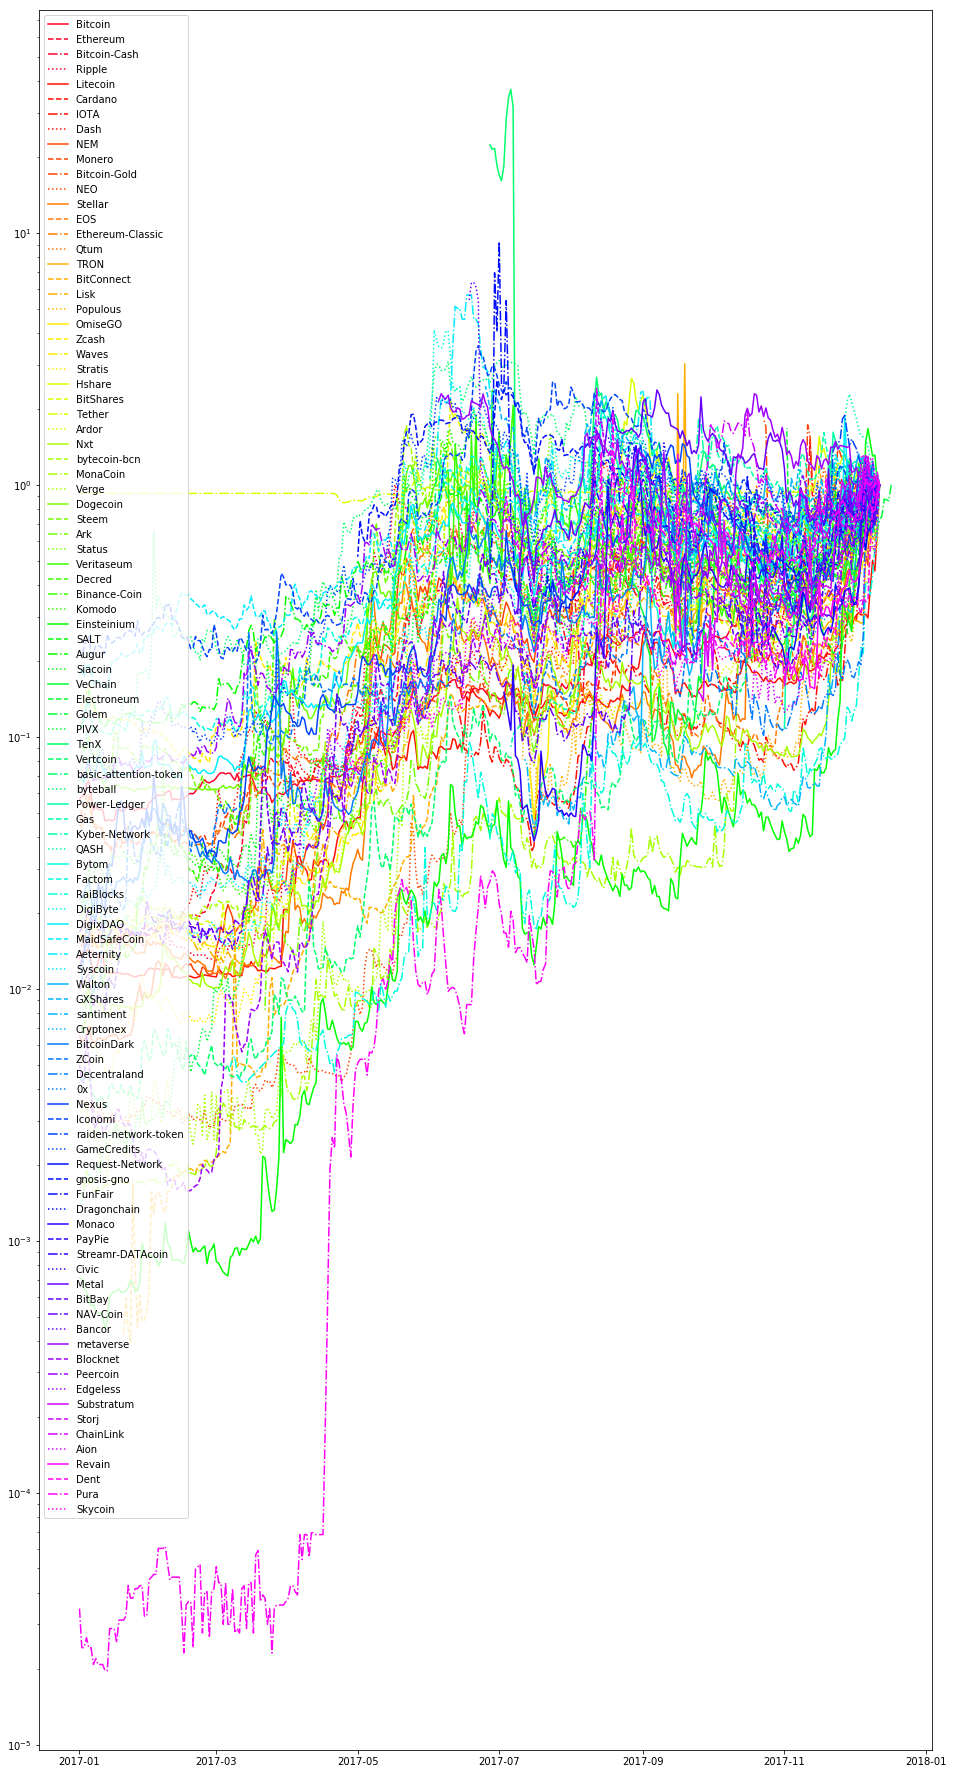

In [376]:
fig = plt.figure(figsize=(16,32))
ax = fig.add_subplot(111)

NUMBER_TO_PLOT = 100

NUM_COLORS = NUMBER_TO_PLOT
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)

cm = plt.get_cmap('gist_rainbow')

i = 0
for symbol in overview_df.head(NUMBER_TO_PLOT).Symbol:
    
    try:
        data = prices_df.loc[prices_df['Symbol'] == symbol]['High'].values
        date = pd.to_datetime(prices_df.loc[prices_df['Symbol'] == symbol]['Date']).values
        normalised_data = data/data[0]

        lines = ax.semilogy(date, normalised_data, label=symbol)
        lines[0].set_color(cm(i//NUM_STYLES*float(NUM_STYLES)/NUM_COLORS))
        lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])
        i = i + 1
    except:
        print(symbol)
plt.legend()
plt.show()

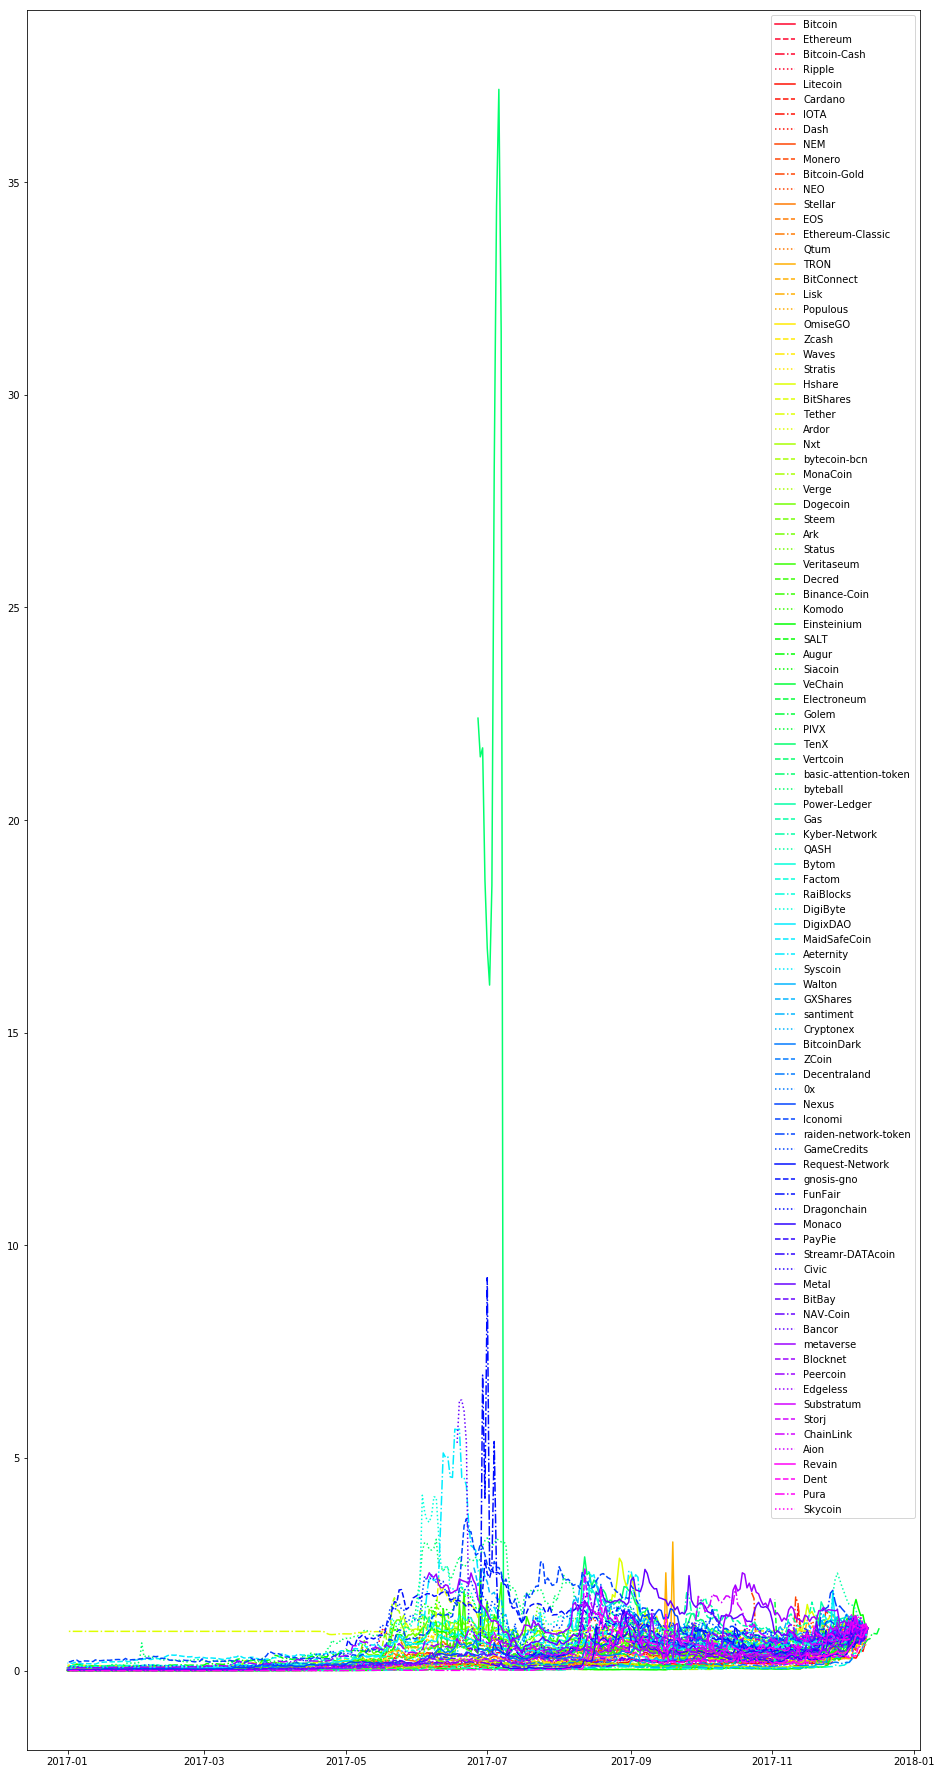

In [377]:
fig = plt.figure(figsize=(16,32))
ax = fig.add_subplot(111)

NUMBER_TO_PLOT = 100

NUM_COLORS = NUMBER_TO_PLOT
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)

cm = plt.get_cmap('gist_rainbow')

i = 0
for symbol in overview_df.head(NUMBER_TO_PLOT).Symbol:
    data = prices_df.loc[prices_df['Symbol'] == symbol]['High'].values
    #date = prices_df.sort_values(by='Date', ascending=True).loc[prices_df['Symbol'] == symbol]['Date'].values
    #date = pd.to_datetime(prices_df.sort_values(by='Date', ascending=True).loc[prices_df['Symbol'] == symbol]['Date']).values
    date = pd.to_datetime(prices_df.loc[prices_df['Symbol'] == symbol]['Date']).values
    #date = pd.to_datetime(prices_df.sort_values(by='Date', ascending=True).loc[prices_df['Symbol'] == symbol]['Date']).values

    
    normalised_data = data/data[0]
    #plt.semilogy(date, normalised_data, label=symbol)
    
    lines = ax.plot(date, normalised_data, label=symbol)
    lines[0].set_color(cm(i//NUM_STYLES*float(NUM_STYLES)/NUM_COLORS))
    lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])
    i = i + 1
plt.legend()
plt.show()